In [19]:
import import_ipynb as ipynb
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from common import sns_cm, display_accuracy

In [2]:
%%capture
m_knn = ipynb.NotebookLoader().load_module('movements_knn')

#### Now we continue with the decision tree. You should use the decision tree classifier you find in scikit-learn.

##### Use the gridsearchCV as you did for KNN. As hyperparameters use max_depth and criterion. Use accuracy as previously

In [3]:
dt = DecisionTreeClassifier()

##### hyperparameters

In [4]:
param_grid = {
    'max_depth': list(range(1, 50)),
    'criterion': ['gini', 'entropy']
}

In [5]:
grid = GridSearchCV(estimator=dt,
                    param_grid=param_grid,
                    cv=m_knn.folds,
                    scoring='accuracy',
                    return_train_score=False)

##### Create model

In [6]:
grid.fit(m_knn.X_train, m_knn.y_train)

GridSearchCV(cv=KFold(n_splits=40, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

##### Scores

In [7]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 49}

In [8]:
grid.best_score_

0.8979220057146223

##### Does the criterion have an impact on the accuracy? Make an investigation so you can answer this question
Entropy is ideal than gini

In [9]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,...,split33_test_score,split34_test_score,split35_test_score,split36_test_score,split37_test_score,split38_test_score,split39_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018923,0.000635,0.001228,0.000428,gini,1,"{'criterion': 'gini', 'max_depth': 1}",0.327913,0.341463,0.357724,...,0.364130,0.353261,0.372283,0.394022,0.331522,0.380435,0.347826,0.361306,0.021037,98
1,0.028260,0.000599,0.001137,0.000333,gini,2,"{'criterion': 'gini', 'max_depth': 2}",0.439024,0.474255,0.447154,...,0.494565,0.491848,0.500000,0.510870,0.442935,0.497283,0.464674,0.483315,0.025519,96
2,0.038518,0.000909,0.000992,0.000321,gini,3,"{'criterion': 'gini', 'max_depth': 3}",0.520325,0.542005,0.509485,...,0.554348,0.551630,0.562500,0.554348,0.510870,0.584239,0.557065,0.558192,0.022722,94
3,0.048862,0.001110,0.001125,0.000412,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.626016,0.617886,0.577236,...,0.638587,0.649457,0.611413,0.663043,0.635870,0.652174,0.635870,0.643587,0.023699,92
4,0.060829,0.001963,0.001156,0.000370,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.701897,0.696477,0.663957,...,0.690217,0.733696,0.684783,0.701087,0.698370,0.744565,0.717391,0.713237,0.022062,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.173195,0.003206,0.001102,0.000424,entropy,45,"{'criterion': 'entropy', 'max_depth': 45}",0.886179,0.888889,0.913279,...,0.902174,0.899457,0.915761,0.904891,0.883152,0.918478,0.888587,0.896565,0.016732,14
94,0.175059,0.004090,0.001213,0.000398,entropy,46,"{'criterion': 'entropy', 'max_depth': 46}",0.886179,0.891599,0.924119,...,0.891304,0.902174,0.918478,0.923913,0.888587,0.921196,0.885870,0.897787,0.015770,2
95,0.177583,0.004603,0.001188,0.000443,entropy,47,"{'criterion': 'entropy', 'max_depth': 47}",0.891599,0.899729,0.915989,...,0.899457,0.902174,0.910326,0.913043,0.877717,0.918478,0.875000,0.896293,0.015850,20
96,0.175868,0.004021,0.001127,0.000347,entropy,48,"{'criterion': 'entropy', 'max_depth': 48}",0.875339,0.886179,0.907859,...,0.899457,0.904891,0.923913,0.915761,0.885870,0.921196,0.872283,0.895685,0.016552,27


##### Plot the tree with the optimal hyperparameters

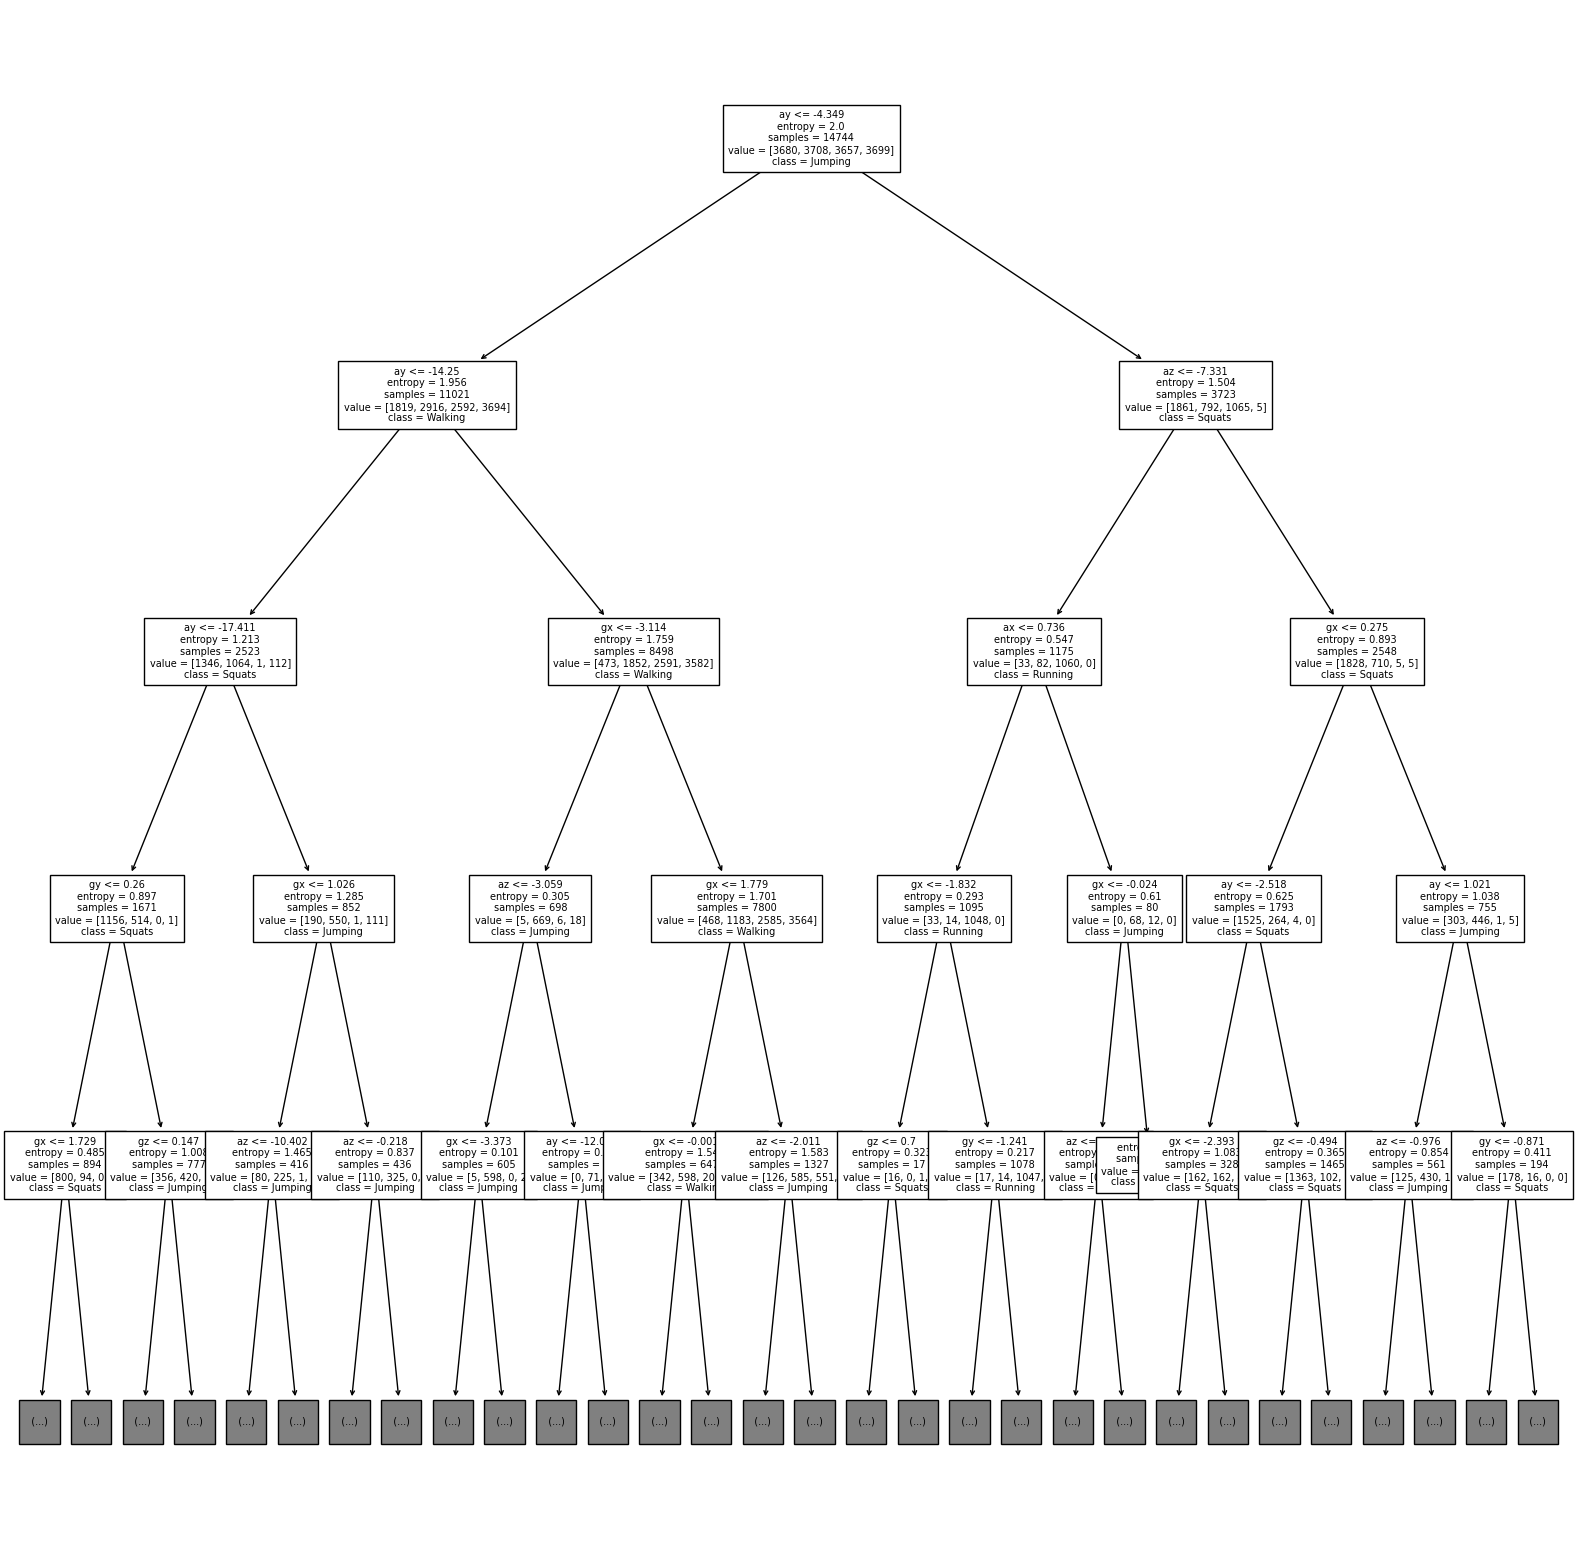

In [23]:
plt.figure(figsize=(20, 20))
plot_tree(
    decision_tree=grid.best_estimator_,
    feature_names=['ax', 'ay', 'az', 'gx', 'gy', 'gz'],
    class_names=m_knn.movement_positions,
    fontsize=7,
    max_depth=4
)
plt.show()

#### Now it is time you look at the test set.

##### Using the tree-model above to predict the accuracy.


In [11]:
y_pred = grid.predict(X=m_knn.X_test)

In [12]:
accuracy_score(y_true=m_knn.y_test, y_pred=y_pred)

0.8952794357026587

#### Plot the confusion matrix as well

#### Validation set

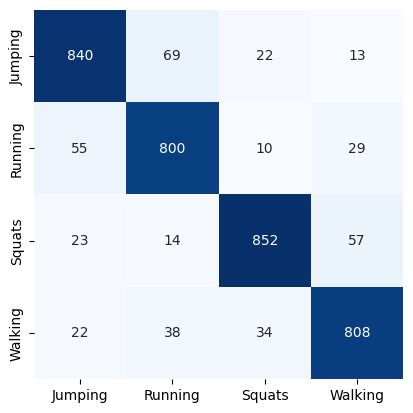

In [13]:
sns_cm(m_knn.y_test, y_pred)

##### Test set

In [14]:
dt_y_test_pred = grid.predict(X=m_knn.X_test_sample)

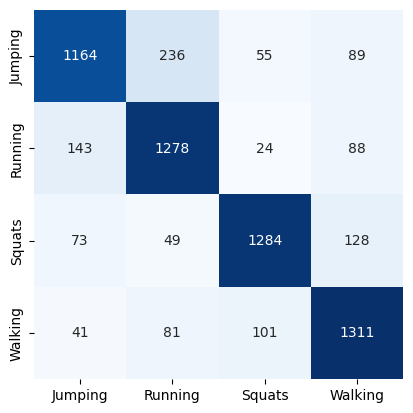

In [15]:
sns_cm(m_knn.y_true_sample, dt_y_test_pred)

##### Explain the difference between the accuracy for the validation set and the test set


##### Explain the result you see in the confusion matrix

In [16]:
display_accuracy(accuracy_score(y_true=m_knn.y_test, y_pred=y_pred), accuracy_score(y_true=m_knn.y_true_sample, y_pred=dt_y_test_pred))

Validation set accuracy: 0.8952794357026587
Test set accuracy: 0.8196908055329536


#### As a last step, it is time to compare the results from the KNN-model and the decision tree.

##### What is the difference between the accuracies?
Both decision tree and KNN give accuracies, but KNN is slightly better. However, KNN is significantly better at predicting movements due to an increase in ~5% accuracy.

##### Mean Score time
The Decision tree is slower than KNN

##### What is the difference between the confusion matrices?


##### What is the difference in fitting the model?
How KNN works:

- A point is compared to k nearest neighbors, then the point is assigned to class that is most common within the k neighbours

How a decision tree works:
- It just splits data based on a dominating feature

Why is knn faster:
- Knn is faster as it just stores the entire dataset, and predictions based on how a point looks like compared to its k nearest neighbours
- On the other hand, decision-trees recursively split data based on what feature is dominant. 